# Gravitational Pulse Wave Scattering and the Geroch group by Penna
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 20, 2022

https://arxiv.org/abs/2201.07662

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,rho,phi,z,dt,drho,dphi,dz = symbols('t rho phi z dt drho dphi dz')

In [4]:
f = Function('f')(rho,z)
f

In [5]:
Omega = Function('Omega')(rho,z)
Omega

In [6]:
gamma = Function('gamma')(rho,z)
gamma

In [10]:
psi = Function('psi')(rho,z)
psi

In [8]:
variables = Matrix([t,rho,phi,z])
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix([dt,drho,dphi,dz])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [9]:
lineElement = expand( -f*(dt - Omega*dphi)**2 + (f**-1)*( exp(2*gamma)*(drho**2 + dz**2) + rho**2 * dphi**2) ) 
lineElement

In [11]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡   -f(ρ, z)          0            Ω(ρ, z)⋅f(ρ, z)            0     ⎤
⎢                                                                   ⎥
⎢                  2⋅γ(ρ, z)                                        ⎥
⎢                 ℯ                                                 ⎥
⎢       0         ──────────              0                   0     ⎥
⎢                  f(ρ, z)                                          ⎥
⎢                                                                   ⎥
⎢                                 2                                 ⎥
⎢                                ρ       2                          ⎥
⎢Ω(ρ, z)⋅f(ρ, z)      0       ─────── - Ω (ρ, z)⋅f(ρ, z)      0     ⎥
⎢                             f(ρ, z)                               ⎥
⎢                                                                   ⎥
⎢                                                          2⋅γ(ρ, z)⎥
⎢                                                         ℯ         ⎥
⎢       0           

In [12]:
import sympy

In [13]:
m = sympy.Array(g)
m

⎡   -f(ρ, z)          0            Ω(ρ, z)⋅f(ρ, z)            0     ⎤
⎢                                                                   ⎥
⎢                  2⋅γ(ρ, z)                                        ⎥
⎢                 ℯ                                                 ⎥
⎢       0         ──────────              0                   0     ⎥
⎢                  f(ρ, z)                                          ⎥
⎢                                                                   ⎥
⎢                                 2                                 ⎥
⎢                                ρ       2                          ⎥
⎢Ω(ρ, z)⋅f(ρ, z)      0       ─────── - Ω (ρ, z)⋅f(ρ, z)      0     ⎥
⎢                             f(ρ, z)                               ⎥
⎢                                                                   ⎥
⎢                                                          2⋅γ(ρ, z)⎥
⎢                                                         ℯ         ⎥
⎢       0           

In [14]:
from einsteinpy.symbolic import *

In [15]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [16]:
metric = MetricTensor(m,syms)

In [17]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡                                                             ∂                      2     
⎢⎢                                                             ──(f(ρ, z))   Ω(ρ, z)⋅f (ρ, z
⎢⎢                                                             ∂ρ                           
⎢⎢                    0                                        ─────────── + ───────────────
⎢⎢                                                              2⋅f(ρ, z)                   
⎢⎢                                                                                       2⋅ρ
⎢⎢                                                                                          
⎢⎢∂                      2       ∂                                                          
⎢⎢──(f(ρ, z))   Ω(ρ, z)⋅f (ρ, z)⋅──(Ω(ρ, z))                                                
⎢⎢∂ρ                             ∂ρ                                                         
⎢⎢─────────── + ────────────────────────────                          

In [18]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

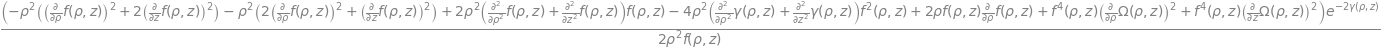

In [19]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [20]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [21]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [22]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [23]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [24]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

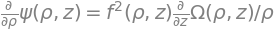

In [25]:
equation2a = Eq( diff(psi,rho) , (f**2/rho)*diff(Omega,z))
equation2a

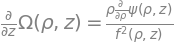

In [31]:
dOmegadz = Eq(diff(Omega,z),solve( equation2a, diff(Omega,z))[0] ) 
dOmegadz

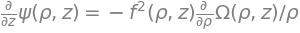

In [26]:
equation2b = Eq( diff(psi,z) , ( - f**2/rho)*diff(Omega,rho))
equation2b

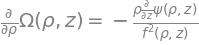

In [32]:
dOmegadrho = Eq(diff(Omega,rho),solve(equation2b, diff(Omega,rho) )[0] ) 
dOmegadrho

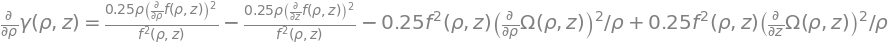

In [46]:
dgammadrho = Eq( diff(gamma,rho), expand( solve( einsteinSimplified[1,1], diff(gamma,rho) )[0] ) )
dgammadrho

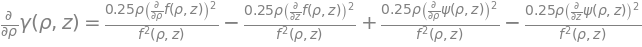

In [49]:
equation3 = dgammadrho.subs(dOmegadz.lhs,dOmegadz.rhs).subs(dOmegadrho.lhs,dOmegadrho.rhs)
equation3

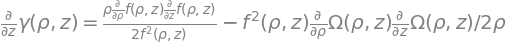

In [41]:
dgammadz = Eq(diff(gamma,z),expand(solve( ricciSimplified[3,1], diff(gamma,z) )[0] ) )
dgammadz

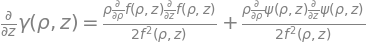

In [53]:
equation4 = dgammadz.subs(dOmegadz.lhs,dOmegadz.rhs).subs(dOmegadrho.lhs,dOmegadrho.rhs) 
equation4

In [55]:
vacuumFieldEquations = Matrix([equation3,equation4])
vacuumFieldEquations

⎡                                  2                       2                       2        
⎢                     ⎛∂          ⎞           ⎛∂          ⎞           ⎛∂          ⎞         
⎢              0.25⋅ρ⋅⎜──(f(ρ, z))⎟    0.25⋅ρ⋅⎜──(f(ρ, z))⎟    0.25⋅ρ⋅⎜──(ψ(ρ, z))⎟    0.25⋅
⎢∂                    ⎝∂ρ         ⎠           ⎝∂z         ⎠           ⎝∂ρ         ⎠         
⎢──(γ(ρ, z)) = ───────────────────── - ───────────────────── + ───────────────────── - ─────
⎢∂ρ                    2                       2                       2                    
⎢                     f (ρ, z)                f (ρ, z)                f (ρ, z)              
⎢                                                                                           
⎢                                    ∂           ∂               ∂           ∂              
⎢                                  ρ⋅──(f(ρ, z))⋅──(f(ρ, z))   ρ⋅──(ψ(ρ, z))⋅──(ψ(ρ, z))    
⎢                    ∂               ∂ρ          ∂z              ∂ρ   